<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [13]:
#from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
from glob import iglob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
import re
import math
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [19]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    ''' ВАШ КОД ЗДЕСЬ '''
    dictionary = {}
    gen_data_ar = []#np.array([], dtype=int)
    next_session_id = 1
    next_word_id = 1
    
    cols = ['session_id']
    new_cols = ['site' + str(i) for i in np.arange(session_length)]
    for c in new_cols:
      cols.append(c)
    cols.append('user_id')
    gen_data = pd.DataFrame(columns = cols)
    
    for file_num, filepath in tqdm_notebook(enumerate(iglob(path_to_csv_files))):
        with open(filepath) as f:
            data = pd.read_csv(f)
            user_id = int(re.search('user(\d+).csv', filepath).group(1))
            loop_count = int(math.ceil(len(data) / window_size))
            for i in np.arange(loop_count):
                chunck_ar = np.zeros(session_length + 2, dtype = int)
                chunck_ar[0] = next_session_id
                session_sites = data['site'].values[i * window_size : i * window_size + session_length]
                for site in session_sites:
                    if site in dictionary:
                        dictionary[site] = (dictionary[site][0], dictionary[site][1] + 1)
                    else:
                        dictionary[site] = (next_word_id ,1)
                        next_word_id += 1
                sessioin_sites_ids = list(map(lambda x : dictionary[x][0], session_sites))
                chunck_ar[1:len(sessioin_sites_ids)+1] = sessioin_sites_ids
                chunck_ar[-1] = user_id
                next_session_id += 1
                gen_data_ar.append(chunck_ar)#np.append(gen_data_ar, chunck_ar)

    gen_data_ar = np.array(gen_data_ar).reshape(next_session_id - 1, session_length + 2)
    #cols = ['session_id']
    #new_cols = ['site' + str(i) for i in np.arange(10)]
    #for c in new_cols:
      #cols.append(c)
    #cols.append('user_id')
    gen_data = pd.DataFrame(data = gen_data_ar, columns = cols)
    gen_data = gen_data.set_index('session_id')
    
    data_without_user_id = gen_data.iloc[:, 0:session_length]
    flatten = data_without_user_id.values.flatten()
    data_csr = [1] * len(flatten)
    indptr_csr = np.arange(0, len(flatten) + 1, session_length)
    X_sparse = csr_matrix((data_csr, flatten, indptr_csr))[:, 1:]
    y_sparse = gen_data['user_id']
    return X_sparse, y_sparse

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [20]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window('capstone_user_identification/3users/user*.csv', 
                                                       'capstone_user_identification/site_freq_3users.pkl',
                                       session_length=5, window_size=3)

A Jupyter Widget

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [21]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

In [22]:
y_s5_w3

session_id
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     3
9     3
10    3
11    3
12    3
Name: user_id, dtype: int32

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [24]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window('capstone_user_identification/' + str(num_users) + 'users/user*.csv', 
                                                       'capstone_user_identification/site_freq_users.pkl',
                                       session_length=session_length, window_size=window_size)
            with open(os.path.join(PATH_TO_DATA, 'X_sparse_' + str(num_users) + 'users_s' + \
                                   str(session_length) + '_w' + str(window_size) +'.pkl'), 'wb') as X_pkl:
              pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 'y_' + str(num_users) + 'users_s' + \
                                   str(session_length) + '_w' + str(window_size) +'.pkl'), 'wb') as y_pkl:
              pickle.dump(y, y_pkl, protocol=2)
            data_lengths.append(len(y))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget


Wall time: 45.4 s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [29]:
''' ВАШ КОД ЗДЕСЬ '''
data_lengths

[14061,
 20087,
 20087,
 20087,
 28118,
 28118,
 28118,
 28118,
 137019,
 195712,
 195712,
 195712,
 273957,
 273957,
 273957,
 273957]

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [32]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [33]:
train_df.head()

,site0,site1,site2,site3,site4,site5,site6,site7,site8,site9,user_id
session_id,,,,,,,,,,,
1,1,2,3,4,3,3,4,3,5,3,31
2,6,7,8,9,3,10,11,12,13,14,31
3,14,4,14,14,15,16,6,17,18,14,31
4,19,20,19,14,14,14,14,21,22,23,31
5,24,14,15,25,26,27,28,29,30,29,31


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 1 to 14061
Data columns (total 11 columns):
site0      14061 non-null int64
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [35]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [52]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [53]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

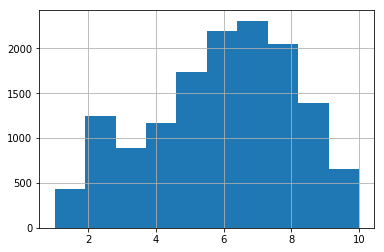

In [54]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([ 427,  651,  894, 1163, 1246, 1394, 1735, 2046, 2197, 2308], dtype=int64)),
 (701.98296889593087, 1406.0999999999999, 0.98690307018020629))

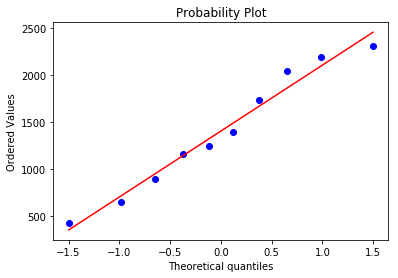

In [56]:
''' ВАШ КОД ЗДЕСЬ '''
import scipy.stats as stats
stats.probplot(pd.Series(num_unique_sites).value_counts(), dist="norm", plot=plt)


In [58]:
print(stats.shapiro(pd.Series(num_unique_sites).value_counts()))

(0.952720046043396, 0.7007318139076233)


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [70]:
has_two_similar = len([x for x in num_unique_sites if x < 10])

In [72]:
len(num_unique_sites)

14061

In [73]:
has_two_similar

13410

In [77]:
pi_val = stats.binom_test(13410, 14061, 0.95)  
''' ВАШ КОД ЗДЕСЬ '''
print(pi_val / 2)

0.0220918960316


**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [80]:
from statsmodels.stats.proportion import proportion_confint
wilson_interval = proportion_confint(has_two_similar, len(num_unique_sites), alpha=0.05, method='wilson')
''' ВАШ КОД ЗДЕСЬ '''

' ВАШ КОД ЗДЕСЬ '

In [81]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

[[4, 5441], [15, 4141], [51, 7813], [52, 3758], [63, 1265], [66, 1388], [70, 1041], [72, 1204], [183, 4158], [184, 2089], [185, 1057], [187, 2630], [191, 1039], [205, 1232], [207, 1804], [208, 1702], [210, 8300], [214, 3094], [568, 1493], [576, 1039], [622, 1868], [699, 1939], [700, 3244], [1026, 1002], [1796, 1441]]


<Container object of 25 artists>

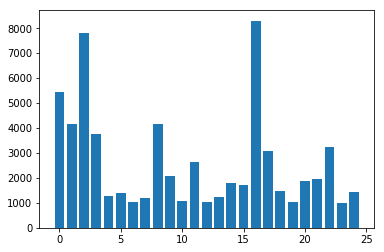

In [159]:
import matplotlib.pyplot as plt
sites = train_df.iloc[:, :-1]
#print(sites_more_1000)
sites_count = np.unique(sites.values, return_counts=True)
sites_more_1000 = [[sites_count[0][i], sites_count[1][i]] for i, k in enumerate(sites_count[0]) if sites_count[1][i] >= 1000]
print(sites_more_1000)
plt.bar(range(len(sites_more_1000)), [i[1] for i in sites_more_1000])

In [204]:
# без 0 сайта
site_freqs = np.array([[sites_count[0][i], sites_count[1][i]] for i, k in enumerate(sites_count[0]) if sites_count[0][i] != 0])
site_freqs = np.array(sorted(site_freqs, key = lambda x: x[1], reverse = True))
site_freqs_df = pd.DataFrame(data = site_freqs)

In [205]:
site_freqs_df[:5]

,0,1
0,210,8300
1,51,7813
2,4,5441
3,183,4158
4,15,4141


In [206]:
site_freqs_df[1][[0, 2, 3]]

0    8300
2    5441
3    4158
Name: 1, dtype: int64

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [207]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = [data[i, 1] for i in indices] 
    return samples

In [208]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [209]:
samples = get_bootstrap_samples(site_freqs, len(site_freqs))
means = [s.mean() for s in samples]
b = stat_intervals(means, 0.05)
print(b)

[ 22.51524527  35.76303684]


In [197]:
ar = np.array([[1, 100], [6, 50], [7, 1], [6, 200]])
ar1 = np.array(sorted(ar, key = lambda x: x[1]))
print(ar1)

[[  7   1]
 [  6  50]
 [  1 100]
 [  6 200]]


## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.